# Lesson 6 - Solution Code

In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import sklearn.linear_model

# read in the mammal dataset
wd = './dataset/'
mammals = pd.read_csv(wd+'msleep.csv')
mammals = mammals[mammals.brainwt.notnull()].copy()

### Explore our mammals dataset

In [11]:
mammals.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NaN,NaN,21.0,0.09820,14.800


### Lets check out a scatter plot of body wieght and brain weight

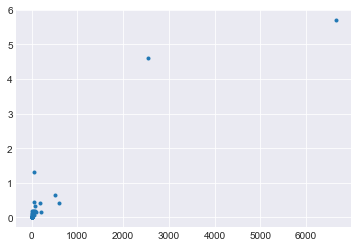

In [12]:
# create a matplotlib figure
plt.figure()
# generate a scatterplot inside the figure
plt.plot(mammals.bodywt, mammals.brainwt, '.')
# show the plot
plt.show()

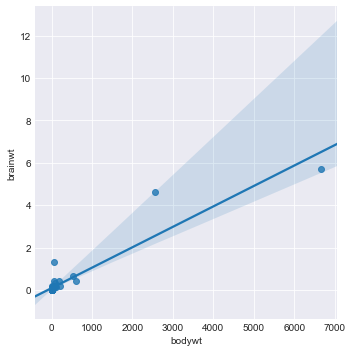

In [13]:
sns.lmplot('bodywt', 'brainwt', mammals)

In [14]:
log_columns = ['bodywt', 'brainwt',]
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)

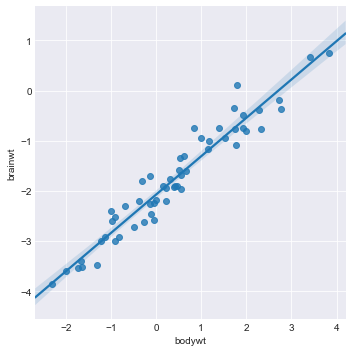

In [15]:
sns.lmplot('bodywt', 'brainwt', log_mammals)

## Guided Practice: Using Seaborn to generate single variable linear model plots (15 mins)
Update and complete the code below to use lmplot and display correlations between body weight and two dependent variables: sleep_rem and awake.


In [16]:
log_columns = ['bodywt', 'brainwt',]  # any others?
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)


##### Complete below for sleep_rem and awake as a y, with variables you've already used as x.


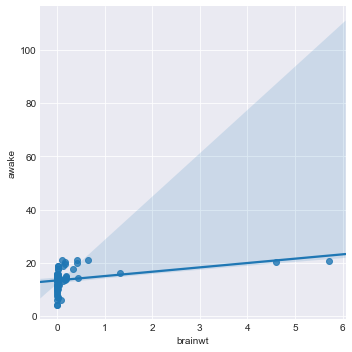

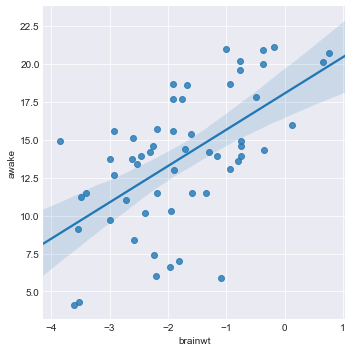

In [17]:
sns.lmplot(x, y, mammals)
sns.lmplot(x, y, log_mammals)

#### Solution:

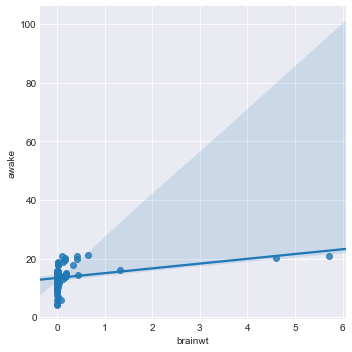

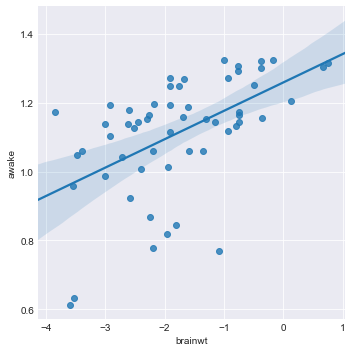

In [18]:
log_columns = ['bodywt', 'brainwt', 'awake', 'sleep_rem']  # any others?
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)

# one other example, using brainwt and awake
x = 'brainwt'
y = 'awake'
sns.lmplot(x, y, mammals)
sns.lmplot(x, y, log_mammals)

## Introduction: Single Regression Analysis in statsmodels & scikit (10 mins)

In [19]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

X = mammals[['bodywt']]
y = mammals['brainwt']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=mammals).fit()
#print the full summary
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     367.7
Date:                Thu, 05 Apr 2018   Prob (F-statistic):           9.16e-26
Time:                        20:59:35   Log-Likelihood:                -20.070
No. Observations:                  56   AIC:                             44.14
Df Residuals:                      54   BIC:                             48.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0859      0.048      1.782      0.080      -0.011       0.183
X              0.0010   5.03e-05     19.176      0.000       0.001       0.001
==============================================================================
Omnibus:                       85.068   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1330.630
Skew:                           4.258   Prob(JB):                    1.14e-289
Kurtosis:                      25.311   Cond. No.                         981.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### use Statsmodels to make the prediction

In [20]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'X': [50]})
X_new.head()

,X
0,50


In [21]:
lm.predict(X_new)

0    0.134115
dtype: float64

### Repeat in Scikit with handy plotting

When modeling with sklearn, you'll use the following base principals.

- All sklearn estimators (modeling classes) are based on this base estimator. This allows you to easily rotate through estimators without changing much code.
- All estimators take a matrix, X, either sparse or dense.
- Many estimators also take a vector, y, when working on a supervised machine learning problem. Regressions are supervised learning because we already have examples of y given X.
- All estimators have parameters that can be set. This allows for customization and higher level of detail to the learning process. The parameters are appropriate to each estimator algorithm.

('P Values:', array([9.15540205e-26]))
('Coefficients:', array([0.00096395]))
('y-intercept:', 0.0859173102936466)
('R-Squared:', 0.8719491980865914)


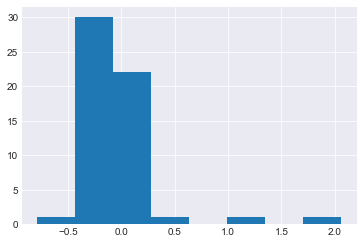

In [22]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print('P Values:', pvals)
    print('Coefficients:', algo.coef_)
    print('y-intercept:', algo.intercept_)
    print('R-Squared:', algo.score(X,y))
    plt.figure()
    plt.hist(residuals, bins=np.int(np.ceil(np.sqrt(len(y)))))
    # keep the model
    return(algo)

X = mammals[['bodywt']]
y = mammals['brainwt']
lm = linear_model.LinearRegression()
lm = get_linear_model_metrics(X, y, lm)

## Demo: Significance is Key (20 mins)

### What does our output tell us?

Our output tells us that:

* The relationship between bodywt and brainwt isn't random (p value approaching 0)  
* The model explains, roughly, 87% of the variance of the dataset (the largest errors being in the large brain and body sizes)  
* With this current model, brainwt is roughly bodywt * 0.00096395  
* The residuals, or error in the prediction, is not normal, with outliers on the right. A better with will have similar to normally distributed error.

### Evaluating Fit, Evaluating Sense

Although we know there is a better solution to the model, we should evaluate some other sense things first. For example, given this model, what is an animal's brainwt if their bodywt is 0?

In [23]:
# prediction at 0?
print(lm.predict([[0]]))

[0.08591731]


('P Values:', array([9.15540205e-26]))
('Coefficients:', array([0.00098291]))
('y-intercept:', 0.0)
('R-Squared:', 0.864418807451033)
[0.]


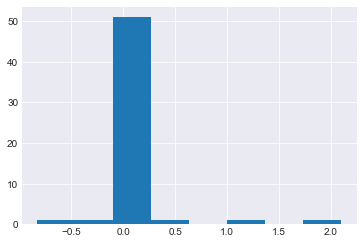

In [24]:
lm = linear_model.LinearRegression(fit_intercept=False)
lm = get_linear_model_metrics(X, y, lm)
# prediction at 0?
print(lm.predict([[0]]))

#### Intrepretation (see slides first)
With linear modeling we call this part of the linear assumption. Consider it a test to the model. If an animal's body weights nothing, we expect their brain to be nonexistent. That given, we can improve the model by telling sklearn's LinearRegression object we do not want to fit a y intercept.

Now, the model fits where brainwt = 0, bodywt = 0.
Because we start at 0, the large outliers have a greater effect, so the coefficient has increased.
Fitting the this linear assumption also explains slightly less of the variance.

## Guided Practice: Using the LinearRegression object (15 mins)

We learned earlier that the the data in its current state does not allow for the best linear regression fit. 

Generate two more models using the log-transformed data to see how this transform changes the model's performance. 

Complete the following code so that X and y match the log-transformed data. Complete the loop by setting the list to be one True and one False.

In [25]:
#starter
X =
y =
loop = []
for boolean in loop:
    print('y-intercept:', boolean)
    lm = linear_model.LinearRegression(fit_intercept=boolean)
    get_linear_model_metrics(X, y, lm)
    print()

SyntaxError: invalid syntax (<ipython-input-25-64cd12c13fc1>, line 2)

('y-intercept:', True)
('P Values:', array([3.56282243e-33]))
('Coefficients:', array([0.76516177]))
('y-intercept:', -2.0739316408388953)
('R-Squared:', 0.9318516153673656)
()
('y-intercept:', False)
('P Values:', array([3.56282243e-33]))
('Coefficients:', array([0.35561441]))
('y-intercept:', 0.0)
('R-Squared:', -2.410532114370229)
()


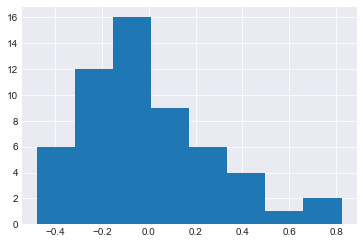

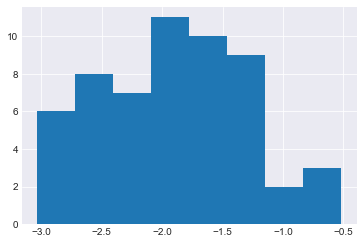

In [26]:
#solution
X = log_mammals[['bodywt']]
y = log_mammals['brainwt']
loop = [True, False]
for boolean in loop:
    print('y-intercept:', boolean)
    lm = linear_model.LinearRegression(fit_intercept=boolean)
    get_linear_model_metrics(X, y, lm)
    print()

### Check: Which model performed the best? The worst? Why?



### Advanced Methods! 

We will go over different estimators in detail in the future but check it out in the docs if you're curious...

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
('P Values:', array([3.56282243e-33]))
('Coefficients:', array([0.23454772]))
('y-intercept:', -1.859316063035335)
('R-Squared:', 0.4837281094026674)
()
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
('P Values:', array([3.56282243e-33]))
('Coefficients:', array([0.75797972]))
('y-intercept:', -2.0710267434160508)
('R-Squared:', 0.931769516560834)
()
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
('P Values:', array([3.56282243e-33]))
('Coefficients:', array([0.39504621]))
('y-intercept:', -1.92423231660306)
('R-Squared:', 0.7138222849502122)
()


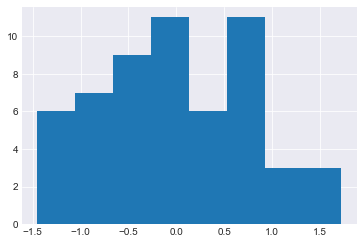

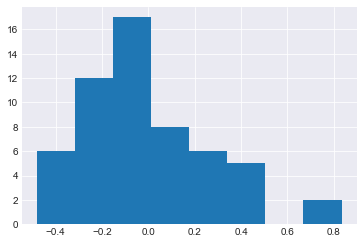

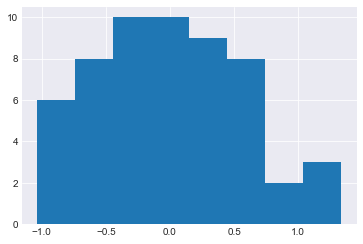

In [27]:
# loading other sklearn regression estimators
X = log_mammals[['bodywt']]
y = log_mammals['brainwt']

estimators = [
    linear_model.Lasso(),
    linear_model.Ridge(),
    linear_model.ElasticNet(),
]

for est in estimators:
    print(est)
    get_linear_model_metrics(X, y, est)
    print()


## Introduction: Multiple Regression Analysis using citi bike data (10 minutes)


In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

For example, a house's price may be best measured by square feet, but a lot of other variables play a vital role: bedrooms, bathrooms, location, appliances, etc. 

For a linear regression, we want these variables to be largely independent of each other, but all of them should help explain the y variable.

We'll work with bikeshare data to showcase what this means and to explain a concept called multicollinearity.

In [28]:
wd = './dataset/'
bike_data = pd.read_csv(wd+'bikeshare.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### What is Multicollinearity?

With the bike share data, let's compare three data points: actual temperature, "feel" temperature, and guest ridership. 

Our data is already normalized between 0 and 1, so we'll start off with the correlations and modeling.

            temp     atemp    casual
temp    1.000000  0.987672  0.459616
atemp   0.987672  1.000000  0.454080
casual  0.459616  0.454080  1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


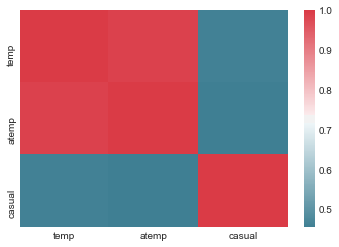

In [29]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = bike_data[['temp', 'atemp', 'casual']].corr()
print(correlations)
print(sns.heatmap(correlations, cmap=cmap))

#### The correlation matrix explains that:

- both temperature fields are moderately correlated to guest ridership;
- the two temperature fields are highly correlated to each other.


Including both of these fields in a model could introduce a pain point of multicollinearity, where it's more difficult for a model to determine which feature is affecting the predicted value.

## We can measure this effect in the coefficients:



temp
('P Values:', array([0.]))
('Coefficients:', array([117.68705779]))
('y-intercept:', -22.812739187991426)
('R-Squared:', 0.2112465416296054)
()
atemp
('P Values:', array([0.]))
('Coefficients:', array([130.27875081]))
('y-intercept:', -26.307167548054544)
('R-Squared:', 0.20618870573273862)
()
temp, atemp
('P Values:', array([0., 0.]))
('Coefficients:', array([116.34021588,   1.52795677]))
('y-intercept:', -22.870339828646664)
('R-Squared:', 0.21124723660961908)
()


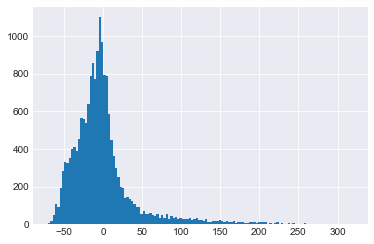

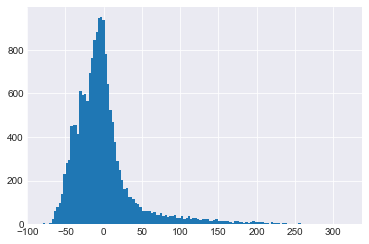

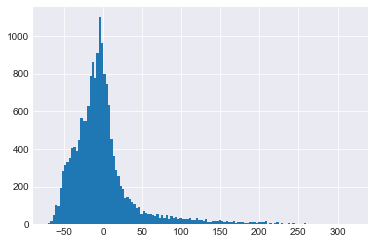

In [30]:
y = bike_data['casual']
x_sets = (
    ['temp'],
    ['atemp'],
    ['temp', 'atemp'],
)

for x in x_sets:
    print(', '.join(x))
    get_linear_model_metrics(bike_data[x], y, linear_model.LinearRegression())
    print()

###  Intrepretation: 
Even though the 2-variable model temp + atemp has a higher explanation of variance than two variables on their own, and both variables are considered significant (p values approaching 0), we can see that together, their coefficients are wildly different. 

This can introduce error in how we explain models.

### What happens if we use a second variable that isn't highly correlated with temperature, like humidity?



('P Values:', array([0., 0.]))
('Coefficients:', array([112.02457031, -80.87301833]))
('y-intercept:', 30.727333858091797)
('R-Squared:', 0.3109011969133708)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

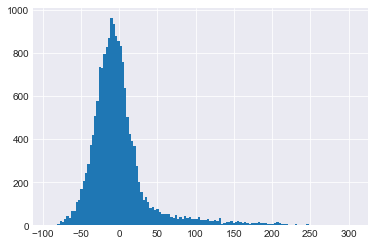

In [31]:
y = bike_data['casual']
x = bike_data[['temp', 'hum']]
get_linear_model_metrics(x, y, linear_model.LinearRegression())


## Guided Practice: Multicollinearity with dummy variables (15 mins)

There can be a similar effect from a feature set that is a singular matrix, which is when there is a clear relationship in the matrix (for example, the sum of all rows = 1).

### Run through the following code on your own.
#### What happens to the coefficients when you include all weather situations instead of just including all except one?

In [33]:
print(bike_data)

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
5            6  2011-01-01       1   0     1   5        0        6   
6            7  2011-01-01       1   0     1   6        0        6   
7            8  2011-01-01       1   0     1   7        0        6   
8            9  2011-01-01       1   0     1   8        0        6   
9           10  2011-01-01       1   0     1   9        0        6   
10          11  2011-01-01       1   0     1  10        0        6   
11          12  2011-01-01       1   0     1  11        0        6   
12          13  2011-01-01       1   0     1  12        0        6   
13          14  2011

('P Values:', array([3.75616929e-73, 3.43170021e-22, 1.57718666e-55, 2.46181288e-01]))
('Coefficients:', array([5.33996323e+12, 5.33996323e+12, 5.33996323e+12, 5.33996323e+12]))
('y-intercept:', -5339963232541.553)
('R-Squared:', 0.02339063004391262)
()
('P Values:', array([3.75616929e-73, 3.43170021e-22, 1.57718666e-55]))
('Coefficients:', array([37.87876398, 26.92862383, 13.38900634]))
('y-intercept:', 2.666666666666501)
('R-Squared:', 0.023390687384083786)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

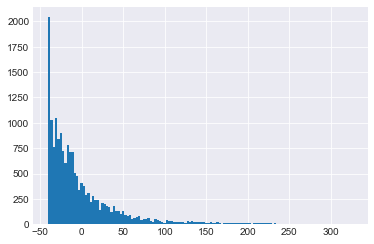

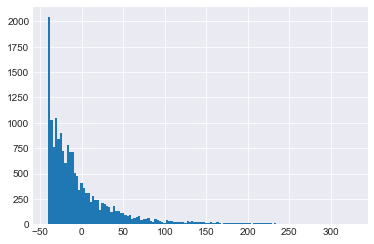

In [34]:
lm = linear_model.LinearRegression()
weather = pd.get_dummies(bike_data.weathersit)

get_linear_model_metrics(weather[[1, 2, 3, 4]], y, lm)
print()
# drop the least significant, weather situation  = 4
get_linear_model_metrics(weather[[1, 2, 3]], y, lm)


### Similar in Statsmodels

In [35]:
# all dummies in the model
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3, 4]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     103.8
Date:                Thu, 05 Apr 2018   Prob (F-statistic):           1.56e-87
Time:                        21:12:57   Log-Likelihood:                -92198.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17374   BIC:                         1.844e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -3.565e+13    4.6e+13     -0.774      0.439   -1.26e+14    5.46e+13
weather[[1, 2, 3, 4]][0]  3.565e+13    4.6e+13      0.774      0.439   -5.46e+13    1.26e+14
weather[[1, 2, 3, 4]][1]  3.565e+13    4.6e+13      0.774      0.439   -5.46e+13    1.26e+14
weather[[1, 2, 3, 4]][2]  3.565e+13    4.6e+13      0.774      0.439   -5.46e+13    1.26e+14
weather[[1, 2, 3, 4]][3]  3.565e+13    4.6e+13      0.774      0.439   -5.46e+13    1.26e+14
==============================================================================
Omnibus:                     8988.108   Durbin-Watson:                   0.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58759.296
Skew:                           2.465   Prob(JB):                         0.00
Kurtosis:                      10.540   Cond. No.                     3.46e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.24e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
#dropping one
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     138.7
Date:                Thu, 05 Apr 2018   Prob (F-statistic):           8.08e-89
Time:                        21:13:02   Log-Likelihood:                -92197.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17375   BIC:                         1.844e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.6667     28.134      0.095      0.924     -52.478      57.812
weather[[1, 2, 3]][0]    37.8788     28.138      1.346      0.178     -17.274      93.031
weather[[1, 2, 3]][1]    26.9286     28.143      0.957      0.339     -28.235      82.092
weather[[1, 2, 3]][2]    13.3890     28.164      0.475      0.635     -41.814      68.592
==============================================================================
Omnibus:                     9001.632   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58962.554
Skew:                           2.468   Prob(JB):                         0.00
Kurtosis:                      10.553   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation (see slide!): 
This model makes more sense, because we can more easily explain the variables compared to the one we left out. 

For example, this suggests that a clear day (weathersit:1) on average brings in about 38 more riders hourly than a day with heavy snow. 

In fact, since the weather situations "degrade" in quality (1 is the nicest day, 4 is the worst), the coefficients now reflect that well. 

However at this point, there is still a lot of work to do, because weather on its own fails to explain ridership well.




## Guided Practice: Combining non-correlated features into a better model (15 mins)

In [37]:
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Complete this code and visualize the correlations of all the numerical features built into the data set  (partner-optional).

We want to:

- Add the three significant weather situations into our current model
- Find two more features that are not correlated with current features, but could be strong indicators for predicting guest riders.

In [ ]:
#starter 
lm = linear_model.LinearRegression()
bikemodel_data = bike_data.join() # add in the three weather situations

cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = # what are we getting the correlations of?
print(correlations)
print(sns.heatmap(correlations, cmap=cmap))

columns_to_keep = [] #[which_variables?]
final_feature_set = bikemodel_data[columns_to_keep]

get_linear_model_metrics(final_feature_set, y, lm)

               temp       hum  windspeed  weather_1  weather_2  weather_3  \
temp       1.000000 -0.069881  -0.023125   0.101044  -0.069657  -0.062406   
hum       -0.069881  1.000000  -0.290105  -0.383425   0.220758   0.309737   
windspeed -0.023125 -0.290105   1.000000   0.005150  -0.049241   0.070018   
weather_1  0.101044 -0.383425   0.005150   1.000000  -0.822961  -0.412414   
weather_2 -0.069657  0.220758  -0.049241  -0.822961   1.000000  -0.177417   
weather_3 -0.062406  0.309737   0.070018  -0.412414  -0.177417   1.000000   
holiday   -0.027340 -0.010588   0.003988   0.009167   0.004910  -0.023664   
hour_1    -0.040738  0.083197  -0.053580   0.008819  -0.006750  -0.005379   
hour_2    -0.045627  0.096198  -0.060241   0.005156  -0.003921  -0.002518   
hour_3    -0.046575  0.108659  -0.065444  -0.001685   0.003843  -0.003117   
hour_4    -0.053459  0.121990  -0.057285  -0.000450   0.000506   0.000096   
hour_5    -0.065571  0.124406  -0.067411  -0.004791   0.011541  -0.010083   

AxesSubplot(0.125,0.125;0.62x0.755)


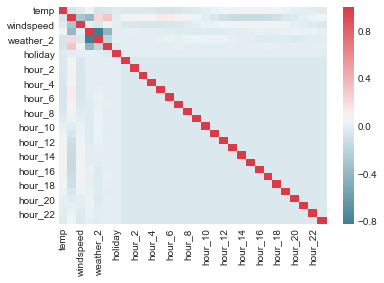

In [38]:
#solution
lm = linear_model.LinearRegression()
weather = pd.get_dummies(bike_data.weathersit)
weather.columns = ['weather_' + str(i) for i in weather.columns]

hours = pd.get_dummies(bike_data.hr)
hours.columns = ['hour_' + str(i) for i in hours.columns]

season = pd.get_dummies(bike_data.season)
season.columns = ['season_' + str(i) for i in season.columns]


bikemodel_data = bike_data.join(weather) # add in the three weather situations
bikemodel_data = bikemodel_data.join(hours)
bikemodel_data = bikemodel_data.join(season)

cmap = sns.diverging_palette(220, 10, as_cmap=True)

columns_to_keep = ['temp', 'hum', 'windspeed', 'weather_1', 'weather_2', 'weather_3', 'holiday',]
columns_to_keep.extend(['hour_' + str(i) for i in range(1, 24)])

correlations = bikemodel_data[columns_to_keep].corr()
print(correlations)
print(sns.heatmap(correlations, cmap=cmap))


## Independent Practice: Building models for other y variables (25 minutes)

We've completely a model together that explains casual guest riders. Now it's your turn to build another model, using a different y variable: registered riders.

#### Pay attention to:

* the distribution of riders (should we rescale the data?)  
* checking correlations with variables and registered riders  
* having a feature space (our matrix) with low multicollinearity  
* model complexity vs explanation of variance: at what point do features in a model stop improving r-squared?  
* the linear assumption -- given all feature values being 0, should we have no ridership? negative ridership? positive ridership?

#### Bonus

* Which variables would make sense to dummy (because they are categorical, not continuous)?  
* What features might explain ridership but aren't included in the data set? 
* Is there a way to build these using pandas and the features available?
* Outcomes: If your model at least improves upon the original model and the explanatory effects (coefficients) make sense, consider this a complete task. 

### If your model has an r-squared above .4, this a relatively effective model for the data available. Kudos!

In [ ]:
bikemodel_data.columns

In [ ]:
y = bike_data['registered']
log_y = np.log10(y+1)
lm = smf.ols(formula=' log_y ~ temp + hum + windspeed + weather_1 + weather_2 + weather_3 + holiday + hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + hour_16 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23', data=bikemodel_data).fit()
#print the full summary
lm.summary()